In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
#Defining the architechture
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

2021-07-22 11:11:14.835792: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

2021-07-22 11:15:40.441799: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
32/32 [==============================] - 2s 10ms/step - loss: 0.6918 - accuracy: 0.5127 - val_loss: 0.6894 - val_accuracy: 0.5388
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6831 - accuracy: 0.5656 - val_loss: 0.6850 - val_accuracy: 0.4795
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5294 - val_loss: 0.6805 - val_accuracy: 0.4749
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.5303 - val_loss: 0.6758 - val_accuracy: 0.4886
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.5470 - val_loss: 0.6706 - val_accuracy: 0.5114
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6544 - accuracy: 0.5528 - val_loss: 0.6649 - val_accuracy: 0.5799
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.6575 - val_loss: 0.6599 - val_accuracy: 0.5982
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 7ms/step - loss: 0.3327 - accuracy: 0.8689 - val_loss: 0.3435 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3306 - accuracy: 0.8708 - val_loss: 0.3432 - val_accuracy: 0.8676
Epoch 61/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8738 - val_loss: 0.3415 - val_accuracy: 0.8676
Epoch 62/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8718 - val_loss: 0.3377 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 0s 6ms/step - loss: 0.3236 - accuracy: 0.8728 - val_loss: 0.3316 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.8767 - val_loss: 0.3380 - val_accuracy: 0.8676
Epoch 65/100
32/32 [==============================] - 0s 9ms/step - loss: 0.3208 - accuracy: 0.8728 - val_loss: 0.3346 - val_accuracy: 0.8676
Epoch 

In [20]:
#Finding the accuracy of our test set
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.8950


0.8949771523475647

In [21]:
#We use matplotlib to visualize the training and validation loss / accuracy over time to see if there’s overfitting in our model.
import matplotlib.pyplot as plt

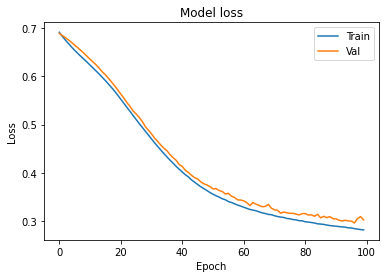

In [23]:
#Visualizing Loss and Accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [27]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [28]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 62ms/step - loss: 0.5076 - accuracy: 0.7671 - val_loss: 0.5573 - val_accuracy: 0.7306
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 0.3754 - accuracy: 0.8366 - val_loss: 0.3335 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 2s 54ms/step - loss: 0.3225 - accuracy: 0.8640 - val_loss: 0.3248 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 0.2844 - accuracy: 0.8845 - val_loss: 0.3053 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 1s 39ms/step - loss: 0.2848 - accuracy: 0.8816 - val_loss: 0.2997 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 46ms/step - loss: 0.2823 - accuracy: 0.8777 - val_loss: 0.2950 - val_accuracy: 0.8904
Epoch 7/100
32/32 [==============================] - 2s 55ms/step - loss: 0.2492 - accuracy: 0.9041 - val_loss: 0.3223 - val_accuracy: 0.8813
Epoch 

32/32 [==============================] - 1s 39ms/step - loss: 0.1299 - accuracy: 0.9364 - val_loss: 0.4492 - val_accuracy: 0.8813
Epoch 59/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1491 - accuracy: 0.9374 - val_loss: 0.3546 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1529 - accuracy: 0.9247 - val_loss: 0.3653 - val_accuracy: 0.8721
Epoch 61/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1477 - accuracy: 0.9384 - val_loss: 0.3776 - val_accuracy: 0.8767
Epoch 62/100
32/32 [==============================] - 1s 38ms/step - loss: 0.1210 - accuracy: 0.9472 - val_loss: 0.3880 - val_accuracy: 0.8721
Epoch 63/100
32/32 [==============================] - 1s 43ms/step - loss: 0.1506 - accuracy: 0.9393 - val_loss: 0.4796 - val_accuracy: 0.8539
Epoch 64/100
32/32 [==============================] - 1s 39ms/step - loss: 0.1481 - accuracy: 0.9423 - val_loss: 0.4342 - val_accuracy: 0.8676
Epoch 65/100

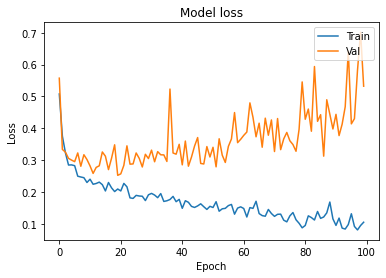

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [33]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [34]:
#Overfitting
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [35]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 85ms/step - loss: 14.2381 - accuracy: 0.6018 - val_loss: 3.8977 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 2s 67ms/step - loss: 1.6599 - accuracy: 0.8317 - val_loss: 0.6493 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 2s 72ms/step - loss: 0.5757 - accuracy: 0.8640 - val_loss: 0.5223 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 2s 76ms/step - loss: 0.5082 - accuracy: 0.8611 - val_loss: 0.5197 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 2s 70ms/step - loss: 0.5135 - accuracy: 0.8571 - val_loss: 0.5610 - val_accuracy: 0.8402
Epoch 6/100
32/32 [==============================] - 2s 73ms/step - loss: 0.4965 - accuracy: 0.8718 - val_loss: 0.5934 - val_accuracy: 0.8174
Epoch 7/100
32/32 [==============================] - 2s 71ms/step - loss: 0.5079 - accuracy: 0.8591 - val_loss: 0.4635 - val_accuracy: 0.8858
Epoch

32/32 [==============================] - 2s 68ms/step - loss: 0.4423 - accuracy: 0.8855 - val_loss: 0.4465 - val_accuracy: 0.8630
Epoch 59/100
32/32 [==============================] - 2s 59ms/step - loss: 0.4336 - accuracy: 0.8885 - val_loss: 0.4262 - val_accuracy: 0.8813
Epoch 60/100
32/32 [==============================] - 2s 52ms/step - loss: 0.4351 - accuracy: 0.8855 - val_loss: 0.4281 - val_accuracy: 0.8858
Epoch 61/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4369 - accuracy: 0.8806 - val_loss: 0.4591 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 2s 71ms/step - loss: 0.4452 - accuracy: 0.8845 - val_loss: 0.4262 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 2s 71ms/step - loss: 0.4320 - accuracy: 0.8963 - val_loss: 0.4427 - val_accuracy: 0.8721
Epoch 64/100
32/32 [==============================] - 2s 54ms/step - loss: 0.4308 - accuracy: 0.8885 - val_loss: 0.4270 - val_accuracy: 0.8813
Epoch 65/100

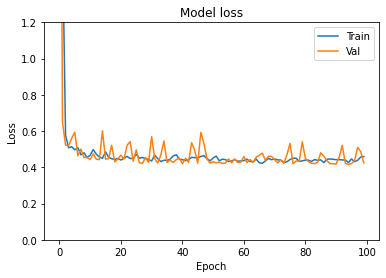

In [37]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()